# CSCS

In [1]:
import numpy as np
import networkx as nx
from data_generate import generate_random_MVN_data
from CSCS import CSCS

In [2]:
np.random.seed(3689)

In [3]:
Y = generate_random_MVN_data(p = 500, a = 0.5, b = 1, diag_a= 0.99, diag_b=1.01,plot = True)

## Parallel implementation with 3 workers

In [4]:
cscs = CSCS(Y = Y,l = 1, num_workers=3)

In [5]:
%timeit L,A,G = cscs.fit()

11.7 s ± 365 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Serial implementation with 1 worker 

In [6]:
cscs = CSCS(Y = Y,l = 1, num_workers=1)

In [7]:
%timeit L,A,G = cscs.fit()

10.7 s ± 185 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
cscs = CSCS(Y = Y,l = 1, num_workers=3)
L,A,G = cscs.fit()

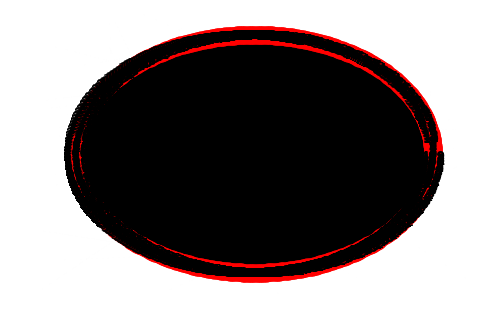

In [9]:
nx.draw_shell(G, with_labels=True, font_weight='bold')